# Task 2 Outliers

# Import and Initializing

In [1]:
import itertools

import numpy as np  # pip install numpy
import scipy.stats  # pip install scipy

import pandas as pd  # pip install pandas
import matplotlib.pyplot as plt  # pip install matplotlib
import seaborn as sns  # pip install seaborn

sns.set_context("notebook")
sns.set_style("whitegrid")

np.seterr("raise")

FIG_SIZE = (14, 4)

In [2]:
def ci_95(data):
    """https://stackoverflow.com/a/15034143"""
    data = np.asanyarray(data)
    data = data.flatten()
    data = data[~np.isnan(data)]
    confidence = 0.95
    n = len(data)
    if n < 2:
        return np.nan
    std_err_of_measurement = scipy.stats.sem(data)
    ci = std_err_of_measurement * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return ci

## Loading and preparing the data

In [3]:
sheets = pd.read_excel("../datasets/DB04_speech_quality_crowdsourcing_dataset.xlsx", sheet_name=None)
print("Sheets:")
list(sheets.keys())

Sheets:


['Description',
 'CS -Full',
 'CS-per file',
 'CS-per condition',
 'CS participants',
 'Lab-per condition']

In [4]:
prev_max_cols = pd.get_option('display.max_columns')
pd.set_option('display.max_columns', None)  
display(sheets["CS -Full"].head(3))
pd.set_option('display.max_columns', prev_max_cols)  

,files,A10DEO061A6L3O,A12HZGOZQD5YK7,A14WLAP6TCEKO0,A16UAN46CNIRHY,A19CB2C4GY4C60,A1AJWS2H14J8MQ,A1CA46R2A6TV9W,A1CGDMOPDIC7EU,A1E6BPJ54S9T5X,A1G187YBG0DVMQ,A1GKD3NG1NNHRP,A1IFIK8J49WBER,A1IIF95II8FISQ,A1MJVTR0PCKBWW,A1P6OXEJ86HQRM,A1PUHCEBSOWETV,A1V2H0UF94ATWY,A1X1IRFYQZ40LD,A1XFAUNS2LQL9H,A1YSYI926BBOHW,A209V2VHLLQ59W,A20WI3VW3CBOWN,A23TGEQ4CG90PA,A247FJ235YHG9J,A258MR1IS96JEP,A25VN1RP8MH63K,A27MJOV91GA8R3,A27PBC5O3Z5ZED,A27W025UEXS1G0,A2BK45LZGGWPLX,A2FLZP3C6U67JY,A2FYQIZWV2UJHS,A2G0HRT8HS9HRZ,A2IQ0QCTQ3KWLT,A2MUCL20GTQJA0,A2NGMLBFZ3YQP5,A2P76QVLSGJR45,A2TI9CGVG147MZ,A2WAQLPXT615HQ,A2Y1ORULU9ITOH,A312D4HWI6WC4N,A31CYXT7WHIG2B,A31FD3QCYZ28Q2,A333STM8M95GJX,A33LYSCQQU1YDJ,A341XKSRZ58FJK,A3696JXTRKL2FI,A39C210BKD7YNN,A3AJJHOAV7WIUQ,A3B7TNVOISSZ2O,A3CWEIEY3TGJFX,A3HT4AO5DN5J2B,A3HTLXAPOBCVVO,A3MD34XEB4H6JF,A3NMQ3019X6YE0,A3O9Q7AV4TDE4G,A3QSJY1FFN0N6V,A3SOJWB6AZWZV9,A3U21PUMQ6NGT2,A8ZUM922CBH6S,ACAJFF4MF5S5X,AENJ7GDYBENYX,AFUPQ61YDVIBQ,AGU1FHY3JHXSF,AQP74RCFA4CF8,ASTWEY4TK6TFM,ASXFMHGSF0GU6,ATXY4CAGV87ZL,AVBRJBJONL47I,AVXEDARJC5HLU,AZLZA0Q87TJZO
0,D401_c01_ef01_s001.wav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,5.0,NaN,5.0,NaN,NaN,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN
1,D401_c01_ef01_s002.wav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,5.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,5.0,4.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,D401_c01_ef01_s003.wav,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,5.0,4.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN


In [5]:
sheet_full = sheets["CS -Full"]

def parse_condition(file_name):
    _, cond, _, _ = file_name.split("_")
    return cond

sheet_full.insert(0, "condition_filled", sheet_full.files.transform(parse_condition).astype('category'))
sheet_full.set_index("files", inplace=True)
sheet_full.head(3)

,condition_filled,A10DEO061A6L3O,A12HZGOZQD5YK7,A14WLAP6TCEKO0,A16UAN46CNIRHY,A19CB2C4GY4C60,A1AJWS2H14J8MQ,A1CA46R2A6TV9W,A1CGDMOPDIC7EU,A1E6BPJ54S9T5X,...,AENJ7GDYBENYX,AFUPQ61YDVIBQ,AGU1FHY3JHXSF,AQP74RCFA4CF8,ASTWEY4TK6TFM,ASXFMHGSF0GU6,ATXY4CAGV87ZL,AVBRJBJONL47I,AVXEDARJC5HLU,AZLZA0Q87TJZO
files,,,,,,,,,,,,,,,,,,,,,
D401_c01_ef01_s001.wav,c01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN
D401_c01_ef01_s002.wav,c01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D401_c01_ef01_s003.wav,c01,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN


## Defining methods

In [6]:
def condition_wo_nan(condition, fn=None, *args, **kwargs):
    data = condition.to_numpy()
    data = data[~np.isnan(data)]
    if fn is not None:
        data = fn(data, *args, **kwargs)
    return data
    
def boxplot_by_condition(sheet):
    by_condition = sheet.groupby("condition_filled")
    condition_ratings = by_condition.apply(condition_wo_nan)

    fig, ax = plt.subplots(figsize=(16, 4))
    plt.boxplot(condition_ratings)
    ax.set_xlabel("Condition")
    ax.set_ylabel("Ratings")

In [7]:
def outlier_bounds(data, outlier_factor = 1.5):
    Q1, Q3 = np.quantile(data, [0.25, 0.75])
    IQR = Q3 - Q1
    lower = Q1 - outlier_factor * IQR
    upper = Q3 + outlier_factor * IQR
    return pd.Series([lower, upper], index=["lower", "upper"])

def count_outlier(condition, data, bounds):
    condition_bounds = bounds.loc[condition]
    data_by_cond = data.set_index("condition_filled", append=True)
    low_outlier = data_by_cond < condition_bounds.lower
    high_outlier = data_by_cond > condition_bounds.upper
    outlier = low_outlier | high_outlier
    num_outlier = outlier.sum(axis="index")
    return num_outlier

def filter_outliers_iqr(sheet):
    by_condition = sheet.groupby("condition_filled")
    bounds = by_condition.apply(condition_wo_nan, outlier_bounds)
    counts = [count_outlier(*condition, bounds) for condition in by_condition]
    outlier_counts_by_condition_by_subject = pd.DataFrame(counts, index=by_condition.groups.keys())
    
    outlier_sum_by_subject = outlier_counts_by_condition_by_subject.sum()
    outlier_sum_by_subject = outlier_sum_by_subject.loc[outlier_sum_by_subject < 3]
    index_non_outlier_subjects = outlier_sum_by_subject.index
    index_non_outlier_subjects = index_non_outlier_subjects.insert(0, "condition_filled")
    return sheet[index_non_outlier_subjects]

def transform_zscore(data):
    data = data - data.mean()
    data = data / data.std()
    return data

def filter_outliers_zscore(sheet):
    by_condition = sheet.groupby("condition_filled")
    condition_zscore = by_condition.apply(transform_zscore)
    outlier_mask = condition_zscore.abs() > 3.29
    inlier_mask = outlier_mask.sum() < 3
    inlier_subjects = inlier_mask[inlier_mask].index
    inlier_index = inlier_subjects.insert(0, "condition_filled")
    return sheet[inlier_index]

## Displaying VQ-ratings

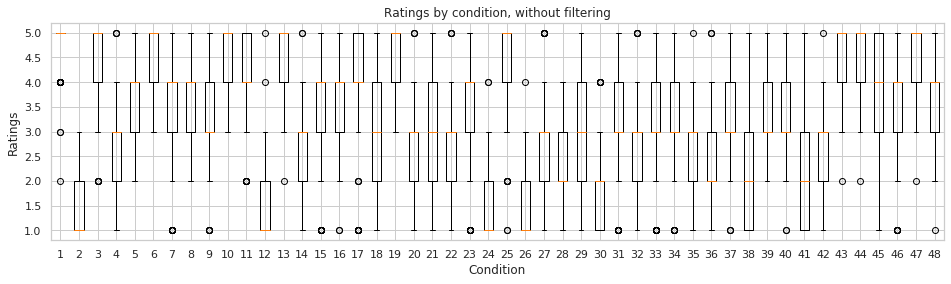

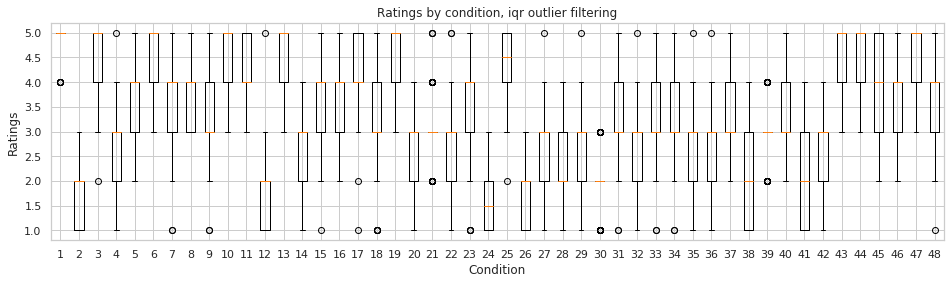

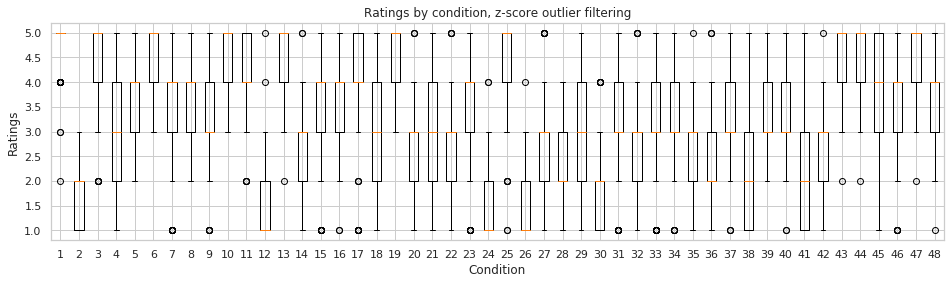

In [8]:
sheet_wo_outliers_iqr = filter_outliers_iqr(sheet_full)
sheet_wo_outliers_zscore = filter_outliers_zscore(sheet_full)

boxplot_by_condition(sheet_full)
plt.title("Ratings by condition, without filtering")
boxplot_by_condition(sheet_wo_outliers_iqr)
plt.title("Ratings by condition, iqr outlier filtering")
boxplot_by_condition(sheet_wo_outliers_zscore)
plt.title("Ratings by condition, z-score outlier filtering")
None

## Displaying all outliers

In [9]:
display("Removed subjects IQR", set(sheet_full.columns) - set(sheet_wo_outliers_iqr.columns))
display("Removed subjects Z-Score", set(sheet_full.columns) - set(sheet_wo_outliers_zscore.columns))

'Removed subjects IQR'

{'A1X1IRFYQZ40LD',
 'A23TGEQ4CG90PA',
 'A258MR1IS96JEP',
 'A27PBC5O3Z5ZED',
 'A2FYQIZWV2UJHS',
 'A2G0HRT8HS9HRZ',
 'A2IQ0QCTQ3KWLT',
 'A2NGMLBFZ3YQP5',
 'A2P76QVLSGJR45',
 'A2TI9CGVG147MZ',
 'A312D4HWI6WC4N',
 'A31FD3QCYZ28Q2',
 'A333STM8M95GJX',
 'A33LYSCQQU1YDJ',
 'A3AJJHOAV7WIUQ',
 'A3B7TNVOISSZ2O',
 'A3HT4AO5DN5J2B',
 'A3HTLXAPOBCVVO',
 'A3MD34XEB4H6JF',
 'A3U21PUMQ6NGT2',
 'AVXEDARJC5HLU',
 'AZLZA0Q87TJZO'}

'Removed subjects Z-Score'

{'A2IQ0QCTQ3KWLT'}

## Calculating MOS, std and 95% CI without outliers

In [10]:
def calculate_statistics(sheet):
    by_condition = sheet.groupby("condition_filled")
    subjects = sheet.columns[1:]
    def block_stats(data, columns, agg_fns, agg_names):
        selected = data[columns].to_numpy()
        selected = selected[~np.isnan(selected)]
        if selected.size == 0:
            return [np.nan] * len(agg_fns)

        results = [fn(selected) for fn in agg_fns]
        return pd.Series(results, index=agg_names)

    stats_names = ["mean", "std", "95% CI", "n"]
    stats_fns = [np.mean, np.std, ci_95, len]

    statistics_by_condition = by_condition.apply(
        block_stats,
        columns=subjects,
        agg_fns=stats_fns,
        agg_names=stats_names,
    )
    statistics_by_file = sheet[subjects].apply(
        block_stats,
        axis="columns",
        columns=subjects,
        agg_fns=stats_fns,
        agg_names=stats_names,
    )
    return pd.concat(
        [statistics_by_condition, statistics_by_file],
        axis="index",
        keys=["by_condition", "by_file"],
        names=["grouped", "name"]
    )

In [11]:
calculate_statistics(sheet_wo_outliers_iqr)

mean       std    95% CI     n
grouped      name                                                      
by_condition c01                     4.916667  0.276385  0.065403  72.0
             c02                     1.666667  0.600128  0.128646  87.0
             c03                     4.378049  0.743102  0.164282  82.0
             c04                     2.687500  0.781458  0.159169  96.0
             c05                     3.607143  0.707407  0.154439  84.0
...                                       ...       ...       ...   ...
by_file      D401_c48_em02_s004.wav  3.142857  0.989743  0.988702   7.0
             D401_c48_em03_s001.wav  3.600000  1.019804  1.415715   5.0
             D401_c48_em03_s002.wav  3.750000  0.433013  0.795612   4.0
             D401_c48_em03_s003.wav  3.800000  0.400000  0.555289   5.0
             D401_c48_em03_s004.wav  3.500000  0.866025  1.591223   4.0

[1200 rows x 4 columns]

In [12]:
calculate_statistics(sheet_wo_outliers_zscore)

mean       std    95% CI      n
grouped      name                                                       
by_condition c01                     4.829146  0.438080  0.061395  199.0
             c02                     1.550239  0.577582  0.078952  209.0
             c03                     4.334928  0.808315  0.110492  209.0
             c04                     2.794258  0.923259  0.126204  209.0
             c05                     3.556098  0.741142  0.102310  205.0
...                                       ...       ...       ...    ...
by_file      D401_c48_em02_s004.wav  3.625000  1.165922  0.641651   16.0
             D401_c48_em03_s001.wav  3.222222  0.916246  0.747011    9.0
             D401_c48_em03_s002.wav  3.625000  0.484123  0.432682    8.0
             D401_c48_em03_s003.wav  4.111111  0.566558  0.461912    9.0
             D401_c48_em03_s004.wav  3.285714  0.880631  0.879704    7.0

[1200 rows x 4 columns]